PROBLEM STATEMENT -Consider only the below columns and prepare a prediction model for predicting Price.
Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

The dataset ToyotaCorolla.csv contains data on used cars on sale during the late summer of 2004 in the Netherlands. It has 1436 records containing details on 38 attributes, including Price, Age, Kilometers, HP, and other specifications.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df= pd.read_csv("ToyotaCorolla.csv")
df.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  �TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

In [3]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [4]:
df.drop(columns=['Id', 'Model', 'Mfg_Month', 'Mfg_Year', 
       'Fuel_Type', 'Met_Color', 'Color', 'Automatic', 
       'Cylinders', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],axis=1,inplace=True)

In [5]:
df.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [6]:
df.describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

In [7]:
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
File encoding decoder utf-8 does not work for this file
Shape of your Data Set: (1436, 38)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  11
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  21
    Number of Discrete 

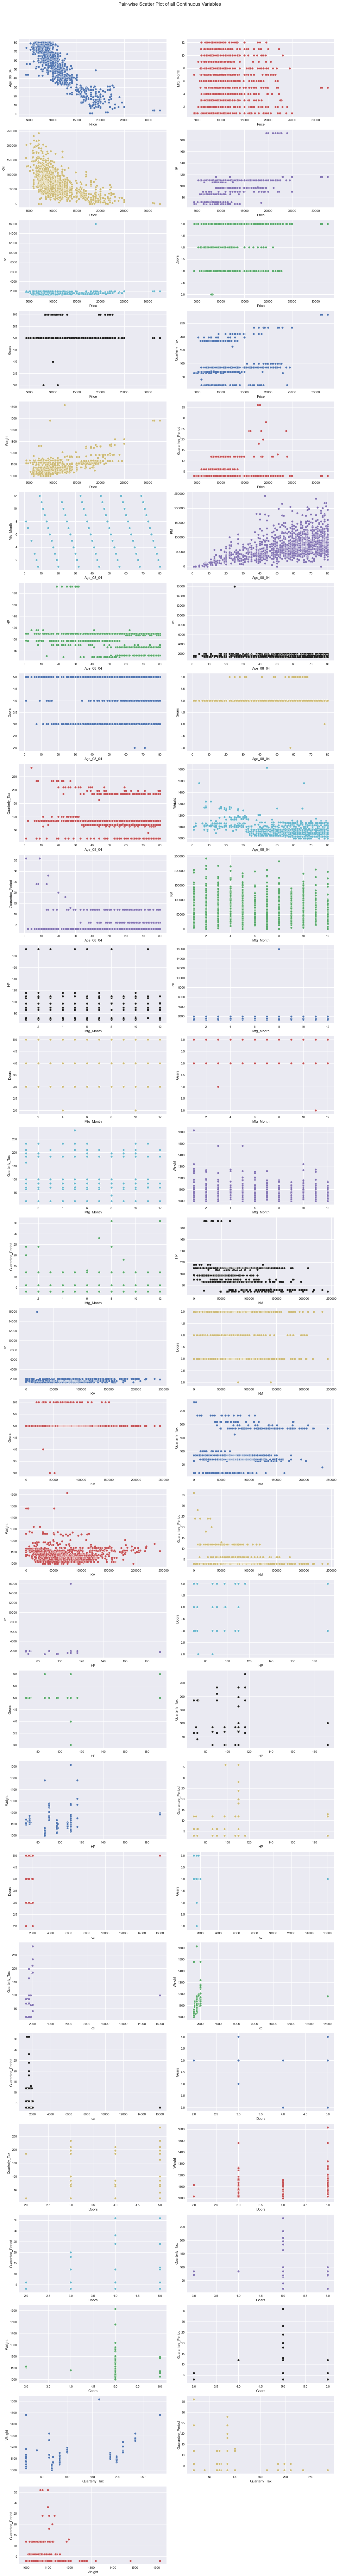

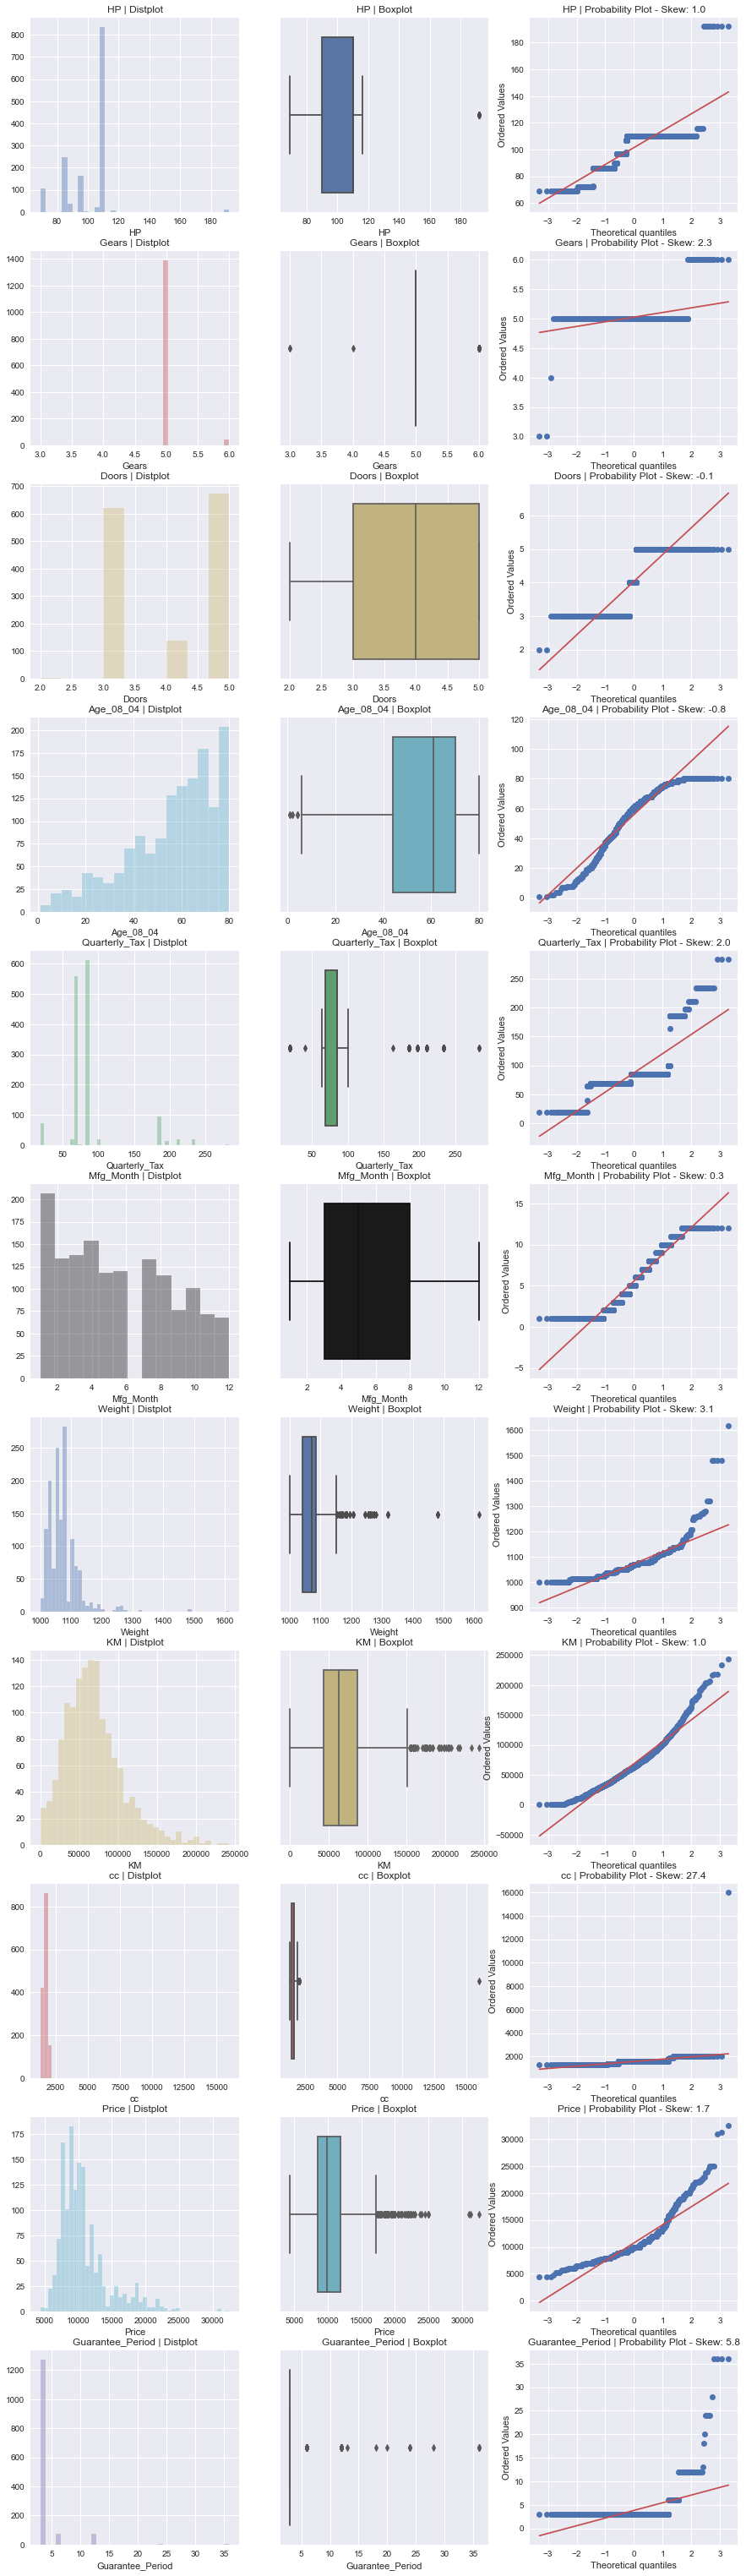

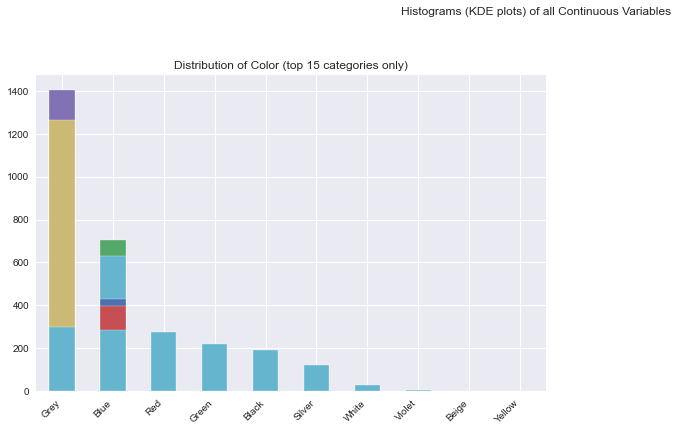

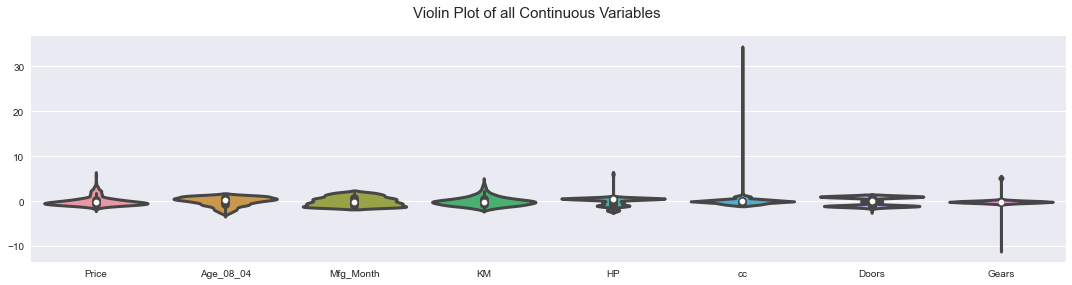

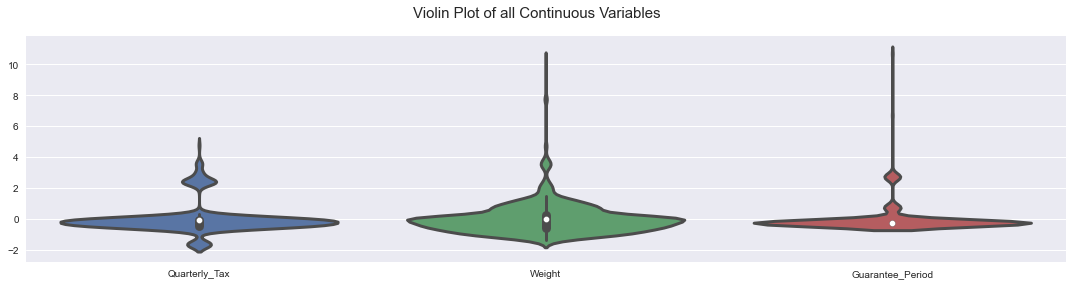

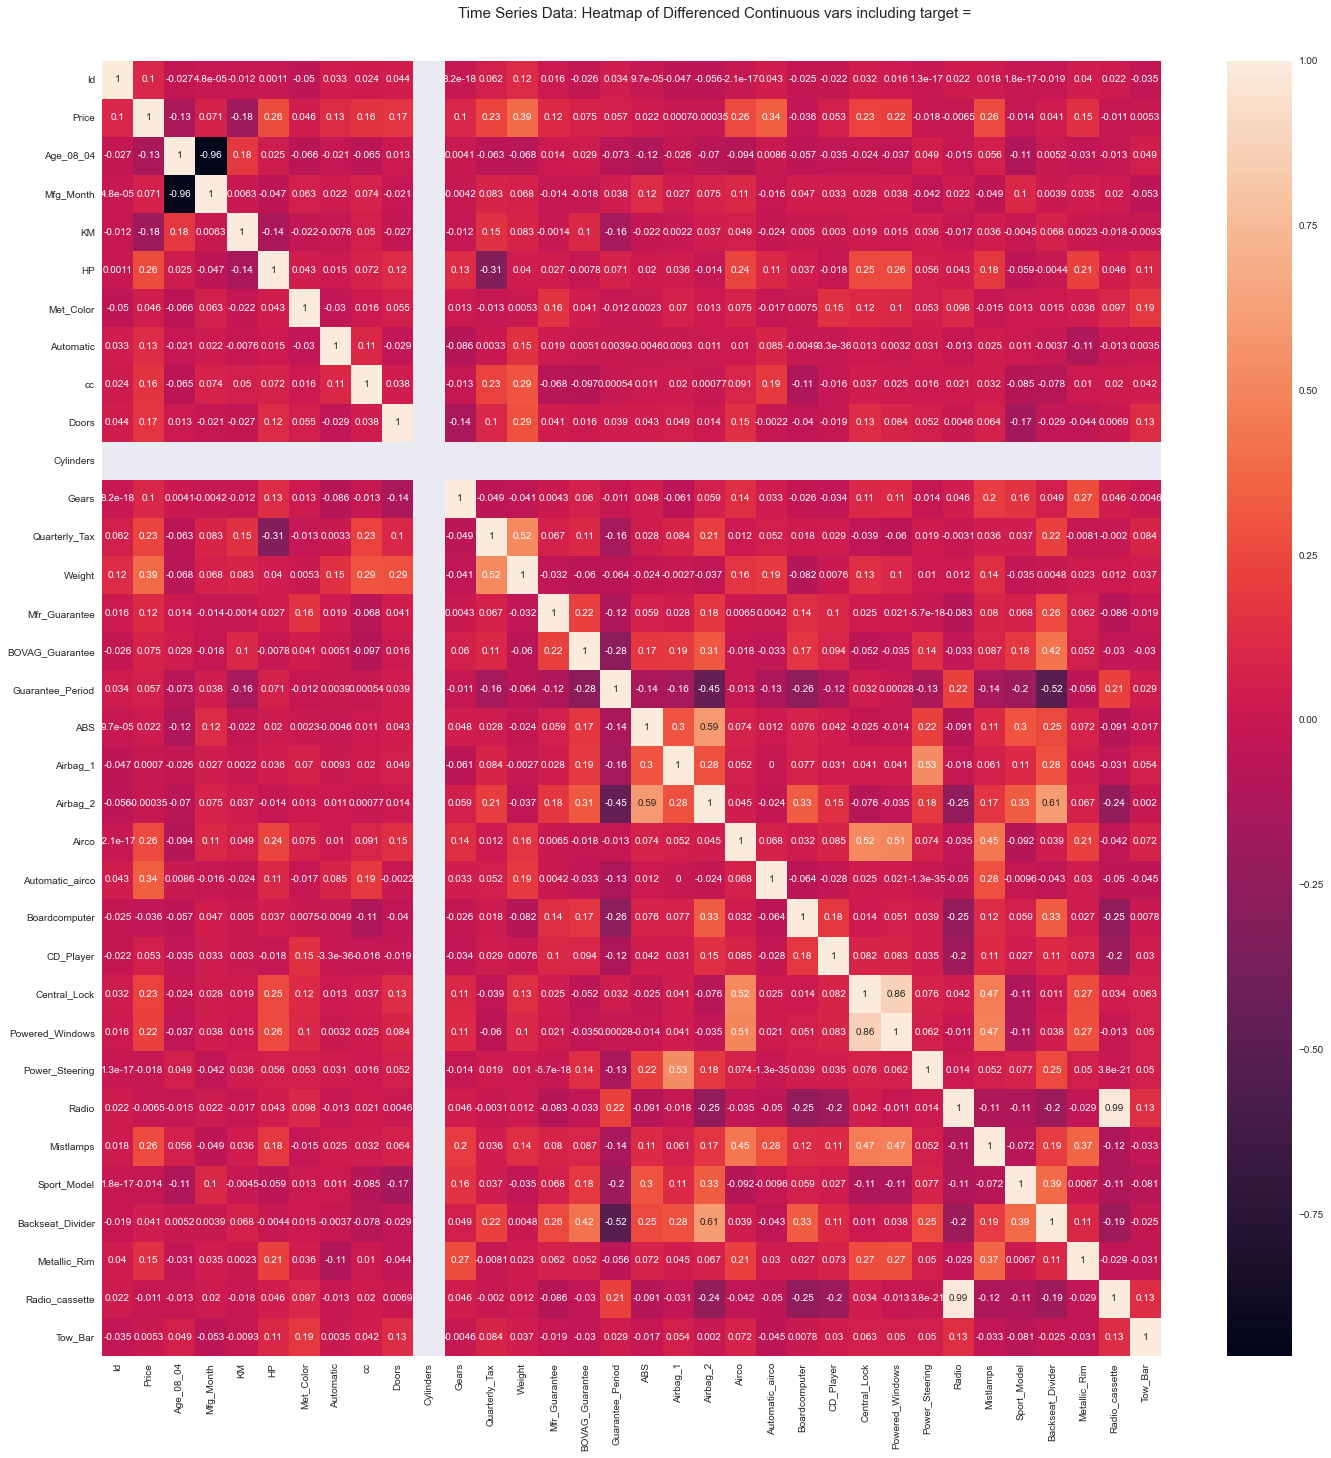

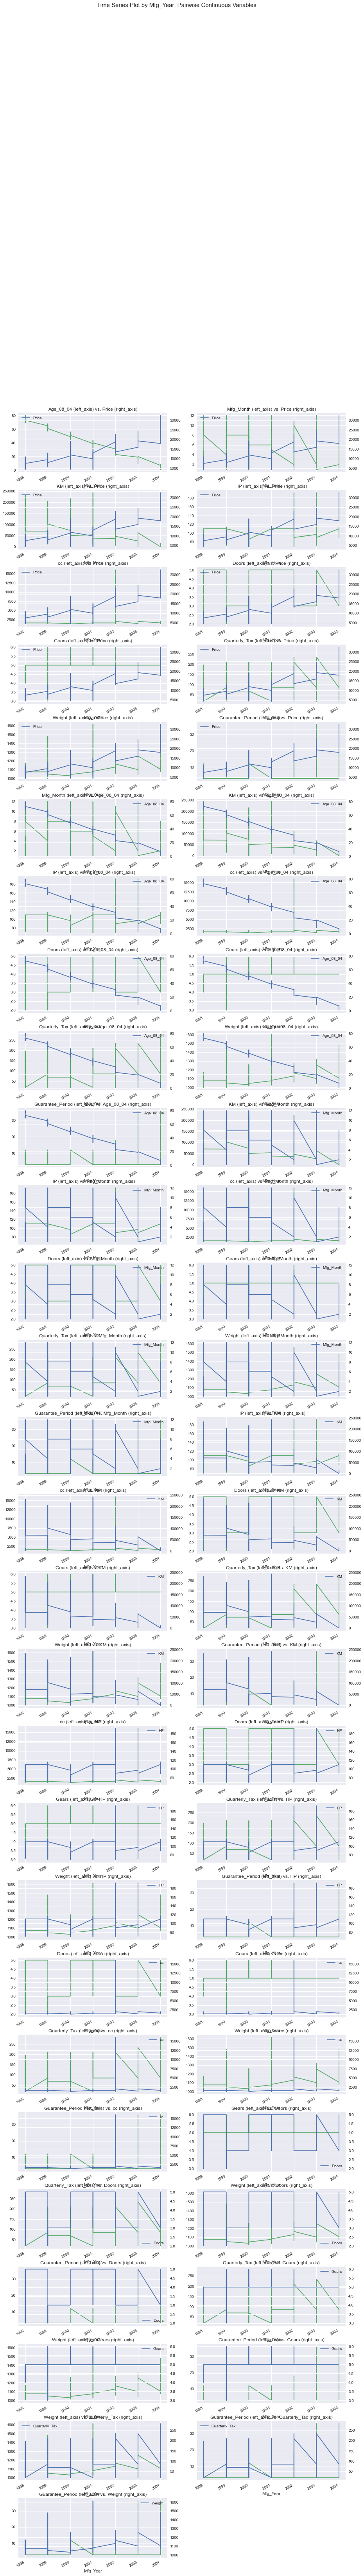

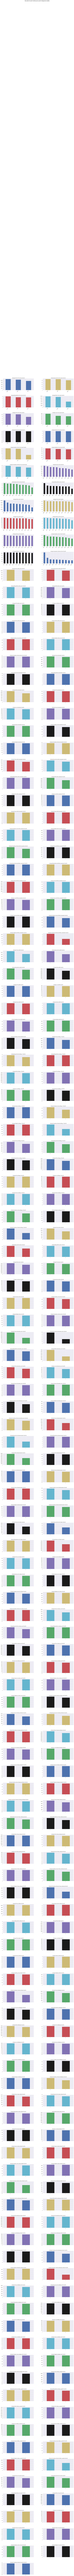

Time to run AutoViz (in seconds) = 188.818

 ###################### VISUALIZATION Completed ########################


In [8]:
from autoviz.AutoViz_Class import AutoViz_Class 
AV=AutoViz_Class()
viz=AV.AutoViz('ToyotaCorolla.csv')

In [9]:
df.corr()

Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000  -0.876590 -0.569960  0.314990  0.126389  0.185326   
Age_08_04     -0.876590   1.000000  0.505672 -0.156622 -0.098084 -0.148359   
KM            -0.569960   0.505672  1.000000 -0.333538  0.102683 -0.036197   
HP             0.314990  -0.156622 -0.333538  1.000000  0.035856  0.092424   
cc             0.126389  -0.098084  0.102683  0.035856  1.000000  0.079903   
Doors          0.185326  -0.148359 -0.036197  0.092424  0.079903  1.000000   
Gears          0.063104  -0.005364  0.015023  0.209477  0.014629 -0.160141   
Quarterly_Tax  0.219197  -0.198431  0.278165 -0.298432  0.306996  0.109363   
Weight         0.581198  -0.470253 -0.028598  0.089614  0.335637  0.302618   

                  Gears  Quarterly_Tax    Weight  
Price          0.063104       0.219197  0.581198  
Age_08_04     -0.005364      -0.198431 -0.470253  
KM             0.015023       0.278165 -0.028598  
HP             0.209477      -0.298432  0.089614  
cc             0.014629       0.306996  0.335637  
Doors         -0.160141       0.109363  0.302618  
Gears          1.000000      -0.005452  0.020613  
Quarterly_Tax -0.005452       1.000000  0.626134  
Weight         0.020613       0.626134  1.000000

<AxesSubplot:>

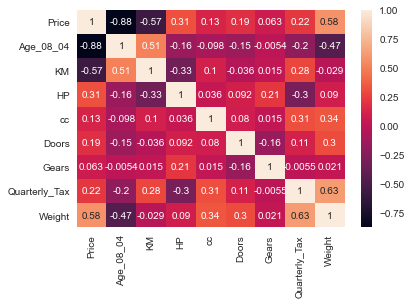

In [10]:
sns.heatmap(df.corr(),annot = True)

In [30]:
std = StandardScaler()
df_std = std.fit_transform(df)
df_std = pd.DataFrame(df_std, columns = df.columns)

In [31]:
df_std.head()

Price  Age_08_04        KM        HP        cc     Doors     Gears  \
0  0.763763  -1.771966 -0.574695 -0.768042  0.997419 -1.085139 -0.140425   
1  0.832715  -1.771966  0.117454 -0.768042  0.997419 -1.085139 -0.140425   
2  0.887877  -1.718184 -0.715386 -0.768042  0.997419 -1.085139 -0.140425   
3  1.163685  -1.610620 -0.547650 -0.768042  0.997419 -1.085139 -0.140425   
4  0.832715  -1.395491 -0.801028 -0.768042  0.997419 -1.085139 -0.140425   

   Quarterly_Tax    Weight  
0        2.98868  1.758561  
1        2.98868  1.758561  
2        2.98868  1.758561  
3        2.98868  1.758561  
4        2.98868  1.853577

In [32]:
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [33]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_std).fit()

In [34]:
#Coefficients
model.params

Intercept        3.109492e-16
Age_08_04       -6.238949e-01
KM              -2.152700e-01
HP               1.308571e-01
cc              -1.416980e-02
Doors           -4.246350e-04
Gears            3.088961e-02
Quarterly_Tax    4.478131e-02
Weight           2.461346e-01
dtype: float64

In [35]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept        3.182390e-14
Age_08_04       -4.651185e+01
KM              -1.662162e+01
HP               1.124102e+01
cc              -1.344222e+00
Doors           -4.041037e-02
Gears            3.016007e+00
Quarterly_Tax    3.014535e+00
Weight           1.587980e+01
dtype: float64 
 Intercept         1.000000e+00
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [36]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

In [37]:
model.summary( )

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        08:54:57   Log-Likelihood:                -606.37
No. Observations:                1436   AIC:                             1231.
Df Residuals:                    1427   BIC:                             1278.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.109e-16      0.010   3.18e-14      1.000      -0.019       0.019
Age_08_04        -0.6239      0.013    -46.512      0.000      -0.650      -0.598
KM               -0.2153      0.013    -16.622      0.000      -0.241      -0.190
HP                0.1309      0.012     11.241      0.000       0.108       0.154
cc               -0.0142      0.011     -1.344      0.179      -0.035       0.007
Doors            -0.0004      0.011     -0.040      0.968      -0.021       0.020
Gears             0.0309      0.010      3.016      0.003       0.011       0.051
Quarterly_Tax     0.0448      0.015      3.015      0.003       0.016       0.074
Weight            0.2461      0.015     15.880      0.000       0.216       0.277
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                         3.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#p values are more than 0.05 for cc and doors(Not significant) or there is no correlation.

In [39]:
model_cc = smf.ols('Price~cc',data=df_std).fit()

In [40]:
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           1.55e-06
Time:                        08:54:58   Log-Likelihood:                -2026.0
No. Observations:                1436   AIC:                             4056.
Df Residuals:                    1434   BIC:                             4067.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.605e-17      0.026   6.13e-16      1.000      -0.051       0.051
cc             0.1264      0.026      4.825      0.000       0.075       0.178
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#cc is significant as p value is zero

In [43]:
model_doors = smf.ols("Price~Doors", data= df_std).fit()
model_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           1.46e-12
Time:                        08:55:09   Log-Likelihood:                -2012.5
No. Observations:                1436   AIC:                             4029.
Df Residuals:                    1434   BIC:                             4040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.605e-17      0.026   6.18e-16      1.000      -0.051       0.051
Doors          0.1853      0.026      7.142      0.000       0.134       0.236
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
## doors is also significant

In [47]:
model_1 = smf.ols("Price~cc+Doors",data= df_std).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           1.15e-15
Time:                        08:56:31   Log-Likelihood:                -2003.1
No. Observations:                1436   AIC:                             4012.
Df Residuals:                    1433   BIC:                             4028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.605e-17      0.026   6.22e-16      1.000      -0.051       0.051
cc             0.1123      0.026      4.340      0.000       0.062       0.163
Doors          0.1764      0.026      6.816      0.000       0.126       0.227
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
(model_1.rsquared,model_1.aic)

(0.046875896130462835, 4012.2488784808497)

In [55]:
(model_doors.rsquared,model_doors.aic)

(0.03434555943109818, 4029.0043720129215)

In [56]:
(model_cc.rsquared,model_cc.aic)

(0.01597422921332292, 4056.0672830070957)

In [48]:
## both are signifiant

In [52]:
rsq_price = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_std).fit().rsquared  
vif_price = 1/(1-rsq_price)

rsq_cc = smf.ols('cc~Price+Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=df_std).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_doors = smf.ols('Doors~Price+Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=df_std).fit().rsquared  
vif_doors = 1/(1-rsq_doors)

rsq_age = smf.ols('Age_08_04~Price+Doors+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=df_std).fit().rsquared
vif_age= 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age_08_04+Price+Doors+HP+cc+Gears+Quarterly_Tax+Weight',data=df_std).fit().rsquared  
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age_08_04+Price+Doors+KM+cc+Gears+Quarterly_Tax+Weight',data=df_std).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

rsq_gears = smf.ols('Gears~Age_08_04+Price+Doors+KM+HP+cc+Quarterly_Tax+Weight',data=df_std).fit().rsquared  
vif_gears = 1/(1-rsq_gears)

rsq_tax = smf.ols('Quarterly_Tax~Age_08_04+Price+Doors+KM+HP+cc+Gears+Weight',data=df_std).fit().rsquared  
vif_tax = 1/(1-rsq_tax)

rsq_wt = smf.ols('Weight~Age_08_04+Price+Doors+KM+HP+cc+Gears+Quarterly_Tax',data=df_std).fit().rsquared  
vif_wt = 1/(1-rsq_wt)

In [53]:
# Storing vif values in a data frame
d1 = {'Features':['Price','cc','Doors','Age_08_04','KM','HP','Gears','Quarterly_Tax','Weight'],'VIF':[vif_price,vif_cc,vif_doors,vif_age,vif_km,vif_hp,vif_gears,vif_tax,vif_wt ]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

Features       VIF
0          Price  7.340136
1             cc  1.165368
2          Doors  1.156577
3      Age_08_04  4.741730
4             KM  2.097055
5             HP  1.545112
6          Gears  1.105727
7  Quarterly_Tax  2.326150
8         Weight  2.961102

In [84]:
##plotting the influence plot

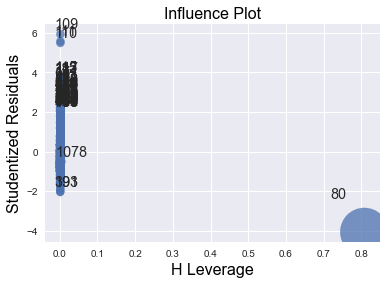

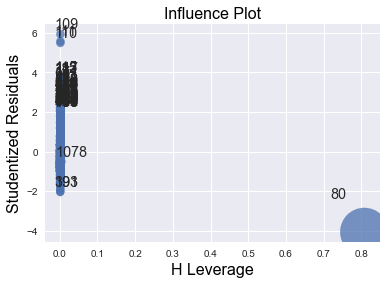

In [85]:
import statsmodels.api as sm
sm.graphics.influence_plot(model_1)

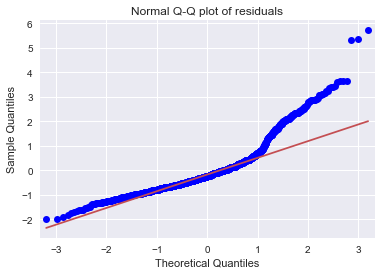

In [86]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_1.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [87]:
list(np.where(model_1.resid<-1.7))

[array([ 80, 191, 192, 393, 402], dtype=int64)]

In [88]:
#removing 80 and checking for significance

In [89]:
df2= df.drop(df.index[[80]],axis=0)
model_2= smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= df2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:27:18   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
#removing 80 and 191, where 191 is the next most influencing index

In [91]:
df3 = df.drop(df.index[[80,191]],axis=0)

model_3= smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= df3).fit()
model_3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1196.
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:27:18   Log-Likelihood:                -12319.
No. Observations:                1434   AIC:                         2.466e+04
Df Residuals:                    1425   BIC:                         2.470e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6384.7859   1376.693     -4.638      0.000   -9085.348   -3684.224
Age_08_04      -121.0410      2.555    -47.378      0.000    -126.053    -116.030
KM               -0.0175      0.001    -13.752      0.000      -0.020      -0.015
HP               38.4307      2.908     13.215      0.000      32.726      44.135
cc               -2.4594      0.306     -8.029      0.000      -3.060      -1.858
Doors           -23.4265     39.075     -0.600      0.549    -100.078      53.225
Gears           534.6789    192.006      2.785      0.005     158.034     911.323
Quarterly_Tax     8.4899      1.426      5.954      0.000       5.693      11.287
Weight           20.2443      1.111     18.226      0.000      18.065      22.423
==============================================================================
Omnibus:                      247.491   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2784.208
Skew:                          -0.436   Prob(JB):                         0.00
Kurtosis:                       9.770   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
#removing 80 and 191 and 393, where 393 is the next most influencing index

In [97]:
df4= df.drop(df.index[[80,191,393]],axis=0)

model_4= smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = df4).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1201.
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:30:13   Log-Likelihood:                -12307.
No. Observations:                1433   AIC:                         2.463e+04
Df Residuals:                    1424   BIC:                         2.468e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6508.6672   1373.356     -4.739      0.000   -9202.686   -3814.649
Age_08_04      -121.2264      2.548    -47.573      0.000    -126.225    -116.228
KM               -0.0174      0.001    -13.701      0.000      -0.020      -0.015
HP               37.6095      2.912     12.913      0.000      31.896      43.323
cc               -2.3999      0.306     -7.841      0.000      -3.000      -1.800
Doors           -20.1486     38.978     -0.517      0.605     -96.610      56.313
Gears           545.0628    191.486      2.846      0.004     169.437     920.689
Quarterly_Tax     8.0574      1.429      5.638      0.000       5.254      10.861
Weight           20.3302      1.108     18.350      0.000      18.157      22.504
==============================================================================
Omnibus:                      250.542   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2887.164
Skew:                          -0.439   Prob(JB):                         0.00
Kurtosis:                       9.898   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
finalmodel = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data=df4).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1201.
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:40:47   Log-Likelihood:                -12307.
No. Observations:                1433   AIC:                         2.463e+04
Df Residuals:                    1424   BIC:                         2.468e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6508.6672   1373.356     -4.739      0.000   -9202.686   -3814.649
Age_08_04      -121.2264      2.548    -47.573      0.000    -126.225    -116.228
KM               -0.0174      0.001    -13.701      0.000      -0.020      -0.015
HP               37.6095      2.912     12.913      0.000      31.896      43.323
cc               -2.3999      0.306     -7.841      0.000      -3.000      -1.800
Doors           -20.1486     38.978     -0.517      0.605     -96.610      56.313
Gears           545.0628    191.486      2.846      0.004     169.437     920.689
Quarterly_Tax     8.0574      1.429      5.638      0.000       5.254      10.861
Weight           20.3302      1.108     18.350      0.000      18.157      22.504
==============================================================================
Omnibus:                      250.542   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2887.164
Skew:                          -0.439   Prob(JB):                         0.00
Kurtosis:                       9.898   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

ERROR! Session/line number was not unique in database. History logging moved to new session 1735


In [101]:
finalmodel_pred = finalmodel.predict(df4)

Text(0, 0.5, 'Predicted values')

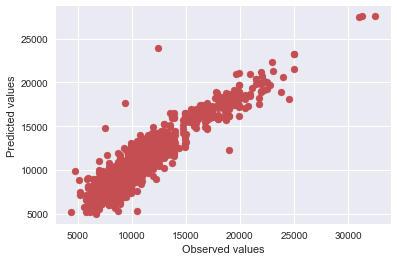

In [102]:
plt.scatter(df4["Price"],finalmodel_pred,c='r');plt.xlabel("Observed values");plt.ylabel("Predicted values")

In [104]:
(finalmodel.rsquared,finalmodel.rsquared_adj)

(0.8709403374416019, 0.870215283157566)

In [ ]:
#Ridge Regression

In [106]:
# Separating the independent and dependent variable.
X_ridge = df_std.drop('Price', axis = 1).values
Y_ridge= df_std["Price"].values.reshape(-1,1)

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ridge,Y_ridge,test_size = 0.25, random_state = 4)

In [110]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.05, normalize=True)

ridge.fit(X_train,y_train)

# Use the model to predict the test dataset.
y_pred_test= ridge.predict(X_test)

# Use the model to predict the train dataset.
y_pred_train = ridge.predict(X_train)


In [114]:
from sklearn.metrics import mean_squared_error

In [117]:
# Calculate the eualuation metrics of the model.
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_pred_train, y_train)
r2_score_test = r2_score(y_pred_test, y_test)
rmse = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)

In [118]:
print('r2_ score for train dataset for multi linear reg : ', r2_score_train)
print('r2_ score for test dataset for multi linear reg : ', r2_score_test)
print('root mean squared error for multi linear reg : ', rmse)

r2_ score for train dataset for multi linear reg :  0.8242210208620698
r2_ score for test dataset for multi linear reg :  0.8379139581731014
root mean squared error for multi linear reg :  0.1428520503225397


In [ ]:
#Lasso regression

In [124]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.5, normalize=True)

lasso.fit(X_train,y_train)

# Use the model to predict the test dataset.
y_pred_test = lasso.predict(X_test)

# Use the model to predict the train dataset.
y_pred_train = lasso.predict(X_train)

# Calculate the eualuation metrics of the model.
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_pred_train, y_train)
r2_score_test = r2_score(y_pred_test, y_test)
rmse = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)

In [125]:
print('r2_ score for train dataset for multi linear reg : ', r2_score_train)
print('r2_ score for test dataset for multi linear reg : ', r2_score_test)
print('root mean squared error for multi linear reg : ', rmse)

r2_ score for train dataset for multi linear reg :  0.0
r2_ score for test dataset for multi linear reg :  -9.418364265754235e+34
root mean squared error for multi linear reg :  1.133694360410174


In [126]:
#Elastic Net

In [128]:
from sklearn.linear_model import ElasticNet
EN = ElasticNet(alpha=0.5, l1_ratio=0.5, normalize=True)

EN.fit(X_train,y_train)

# Use the model to predict the test dataset.
y_pred_test =EN.predict(X_test)

# Use the model to predict the train dataset.
y_pred_train = EN.predict(X_train)

from sklearn.metrics import r2_score
r2_score_train = r2_score(y_pred_train, y_train)
r2_score_test = r2_score(y_pred_test , y_test)
rmse = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)


In [129]:
print('r2_ score for train dataset for multi linear reg : ', r2_score_train)
print('r2_ score for test dataset for multi linear reg : ', r2_score_test)
print('root mean squared error for multi linear reg : ', rmse)

r2_ score for train dataset for multi linear reg :  0.0
r2_ score for test dataset for multi linear reg :  -9.418364265754235e+34
root mean squared error for multi linear reg :  1.133694360410174
